In [1]:
import os
os.chdir('../')

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import contextily as cx
#import pyreadstat
import rasterio

## all_shapefiles contains the combined shapefiles

In [3]:
allshape_files = gpd.read_file('external_dataset/all_shapefiles.gpkg')

In [4]:
allshape_files.head()

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,SEN.1_1,SEN,Senegal,Dakar,Cap Vert|Dacar,NA,Région,Region,1,SN.DK,SN-DK,"MULTIPOLYGON (((-17.46764 14.64874, -17.46764 ..."
1,SEN.2_1,SEN,Senegal,Diourbel,NA,NA,Région,Region,3,SN.DB,SN-DB,"MULTIPOLYGON (((-16.04326 14.55500, -16.04513 ..."
2,SEN.3_1,SEN,Senegal,Fatick,NA,NA,Région,Region,9,SN.FK,SN-FK,"MULTIPOLYGON (((-16.65347 13.64736, -16.65347 ..."
3,SEN.4_1,SEN,Senegal,Kaffrine,NA,NA,Région,Region,12,SN.KF,SN-KA,"POLYGON ((-15.39492 13.75729, -15.39724 13.754..."
4,SEN.5_1,SEN,Senegal,Kaolack,NA,NA,Région,Region,6,SN.KC,SN-KL,"POLYGON ((-15.99889 13.59169, -15.99910 13.591..."


In [5]:
allshape_files[allshape_files.COUNTRY.str.startswith('Mad')]

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
219,MDG.1_1,MDG,Madagascar,Antananarivo,NA,NA,NA,NA,NA,NA,MG-T,"POLYGON ((46.93914 -20.17013, 46.93860 -20.170..."
220,MDG.2_1,MDG,Madagascar,Antsiranana,NA,NA,NA,NA,NA,NA,MG-D,"MULTIPOLYGON (((50.15347 -16.00320, 50.15347 -..."
221,MDG.3_1,MDG,Madagascar,Fianarantsoa,NA,NA,NA,NA,NA,NA,MG-F,"MULTIPOLYGON (((47.04934 -24.08504, 47.04925 -..."
222,MDG.4_1,MDG,Madagascar,Mahajanga,NA,NA,NA,NA,NA,NA,MG-M,"MULTIPOLYGON (((44.23931 -18.96421, 44.23931 -..."
223,MDG.5_1,MDG,Madagascar,Toamasina,NA,NA,NA,NA,NA,NA,MG-A,"MULTIPOLYGON (((47.67118 -20.36464, 47.67130 -..."
224,MDG.6_1,MDG,Madagascar,Toliary,NA,NA,NA,NA,NA,NA,NA,"MULTIPOLYGON (((44.33236 -25.26931, 44.33236 -..."


## SCI data

In [5]:
sci = pd.read_csv("../external_dataset/Meta_sci_data/gadm1_nuts3_counties-gadm1_nuts3_counties - FB Social Connectedness Index - October 2021.tsv", sep='\t')

In [6]:
sci.head()

,user_loc,fr_loc,scaled_sci
0,ABW,ABW,11264841
1,ABW,AGO1,38
2,ABW,AGO10,34
3,ABW,AGO11,32
4,ABW,AGO12,23


## Health indicators

In [7]:
health_ind = pd.read_csv('external_dataset/dhs_health.csv')

In [27]:
health_ind.head()

,GID_1,rel_major,rel_minor,lang_major,lang_minor,middle,poorer,poorest,richer,richest,...,evangelical presbyterian,pentecotist,baha'i,jehovah's witness,jewish,mammon,pentecostal/born again/evangelical,presbyterian,salvation army,apostolic sect
0,AGO1,0.240489,0.759511,1.000000,0.000000,0.259511,0.298913,0.116848,0.183424,0.141304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGO10,0.551410,0.448590,0.887231,0.112769,0.153400,0.126866,0.470149,0.135158,0.114428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO11,0.332359,0.667641,0.995982,0.004018,0.147188,0.007305,0.000000,0.348064,0.497443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGO12,0.133843,0.866157,0.789675,0.210325,0.302103,0.344168,0.207457,0.074570,0.071702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO13,0.126873,0.873127,0.952048,0.047952,0.353646,0.321678,0.080919,0.163836,0.079920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Africa Dataset

In [8]:
africa_gadm1 = pd.read_csv("../external_dataset/Africa_Dataset/GADM1_Africa.csv", encoding='ISO-8859-1')

/tmp/ipykernel_10711/343254432.py:1: DtypeWarning: Columns (1665) have mixed types. Specify dtype option on import or set low_memory=False.
  africa_gadm1 = pd.read_csv("../external_dataset/Africa_Dataset/GADM1_Africa.csv", encoding='ISO-8859-1')


### Adding new_sci measure
##### Yet to be added to the data

In [11]:
def compute_sci_share_in_fr(africa_gadm1: pd.DataFrame, sci_dataset: pd.DataFrame)-> pd.DataFrame:
    africa_gadm1 = africa_gadm1[['GID_1', 'All_devices_age_13_plus_all_genders']].copy()
    sci_dataset = sci_dataset.copy()
    sci_dataset = africa_gadm1.merge(sci_dataset,left_on='GID_1', right_on='fr_loc', how='inner')
    sci_dataset['new_sci'] = sci_dataset['All_devices_age_13_plus_all_genders'] * sci_dataset['scaled_sci']
    return sci_dataset[['user_loc','new_sci']]

In [17]:
new_sci = compute_sci_share_in_fr(gadm_1, sci)

In [18]:
new_sci.head()

,user_loc,new_sci
0,ABW,9.500000e+07
1,AGO1,1.763200e+09
2,AGO10,1.024100e+09
3,AGO11,1.375600e+09
4,AGO12,1.742300e+09


## Generated geometry and variables dataset

In [3]:
gadm_1_v = pd.read_csv("combined_dataset/GADM_1_variables.csv")
gadm_1_geo = gpd.read_file("combined_dataset/GADM_1_geometries.gpkg")
gadm_1 = gadm_1_geo.merge(gpd.GeoDataFrame(gadm_1_v), on='GID_1', how='inner')
gadm_1 = gadm_1.to_crs("3857")

In [5]:
gadm_1['Mean_of_Night_Light']

0      2.176100e+38
1      1.255289e+38
2      2.122340e+38
3      1.012910e+38
4      1.703465e+38
           ...     
440    2.392329e+38
441    2.105567e+38
442    1.979444e+38
443    1.788141e+38
444    1.854032e+38
Name: Mean_of_Night_Light, Length: 445, dtype: float64

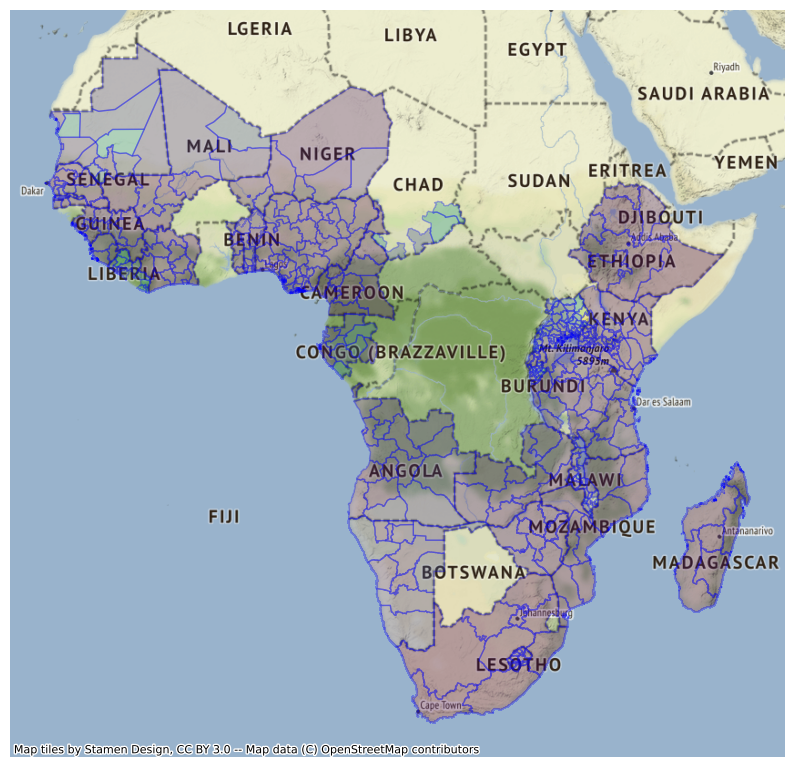

In [5]:
## All countries with data
ax= gadm_1.plot(figsize=(10,10),column='SCI', alpha=0.3, edgecolor="b")
cx.add_basemap(ax)
plt.axis('off')
plt.show()

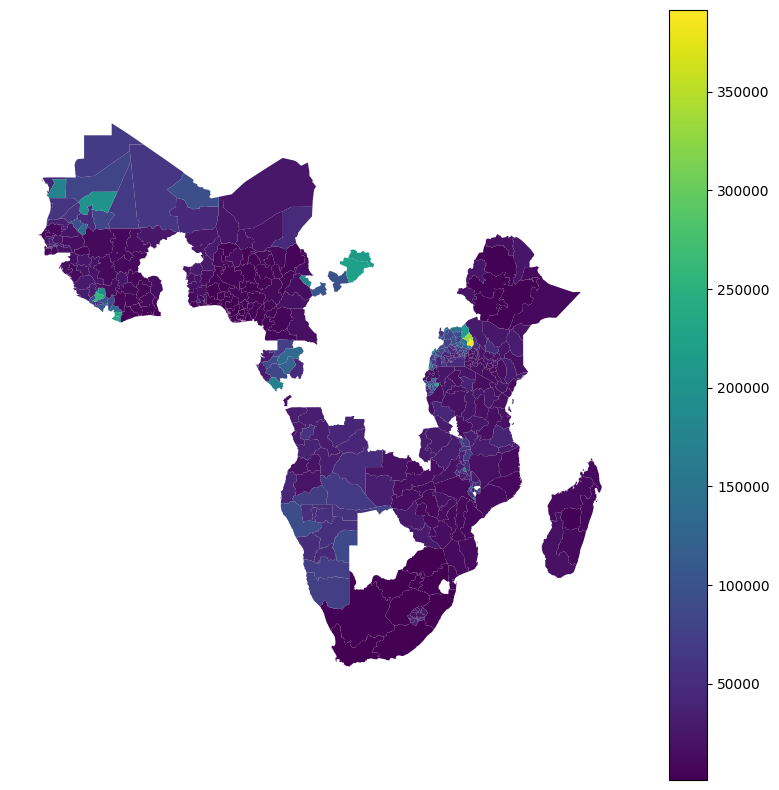

In [7]:
gadm_1.plot(figsize=(10,10),column='Mean_friendship',legend=True)
plt.axis('off')
plt.show()

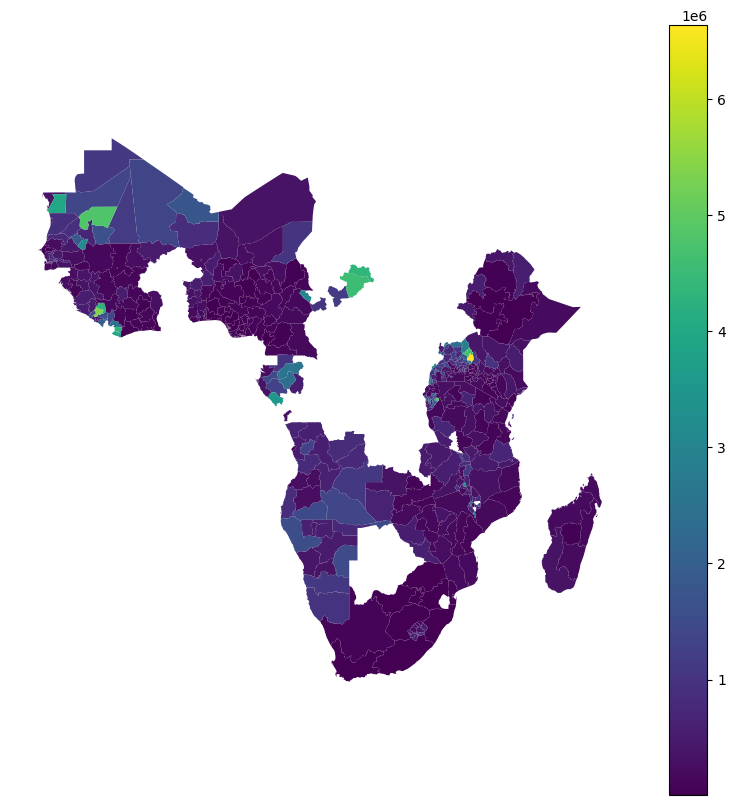

In [8]:
gadm_1.plot(figsize=(10,10),column='Std_friendship',legend=True)
plt.axis('off')
plt.show()

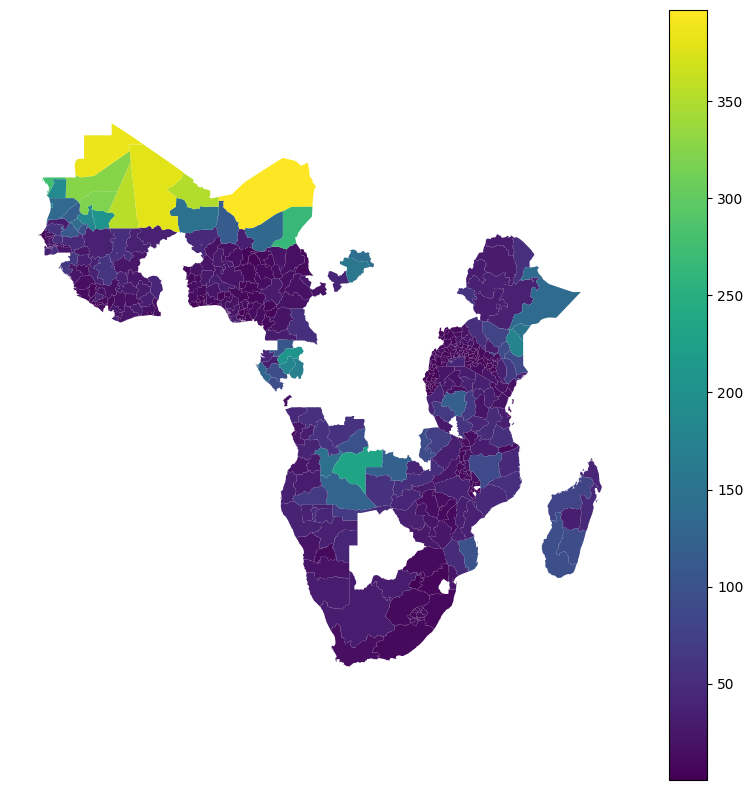

In [21]:
gadm_1.plot(figsize=(10,10),column='Mean_distance_to_major_rd_intesection',legend=True)
plt.axis('off')
plt.show()

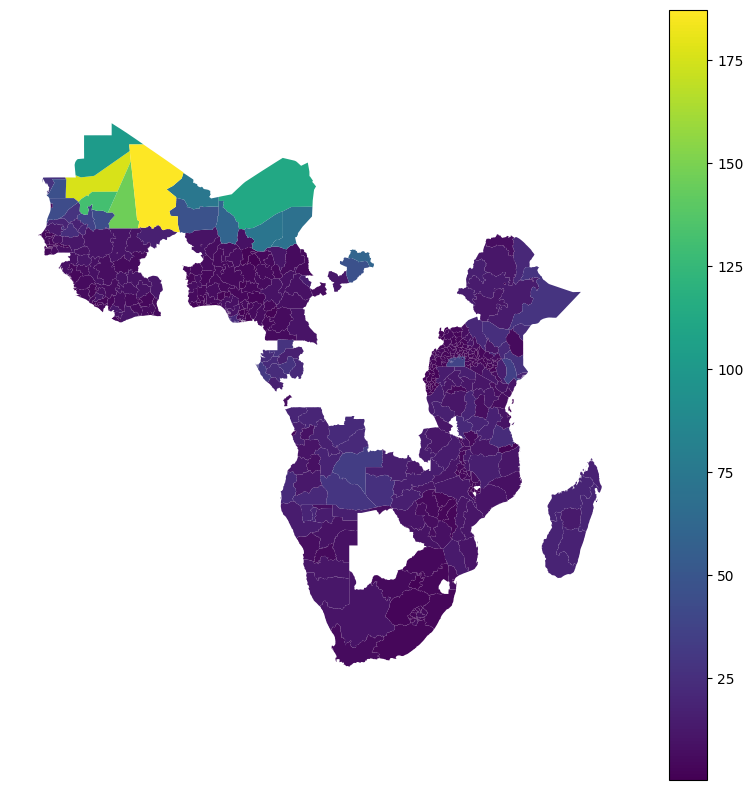

In [24]:
gadm_1.plot(figsize=(10,10),column='Mean_distance_to_major_rd',legend=True)
plt.axis('off')
plt.show()

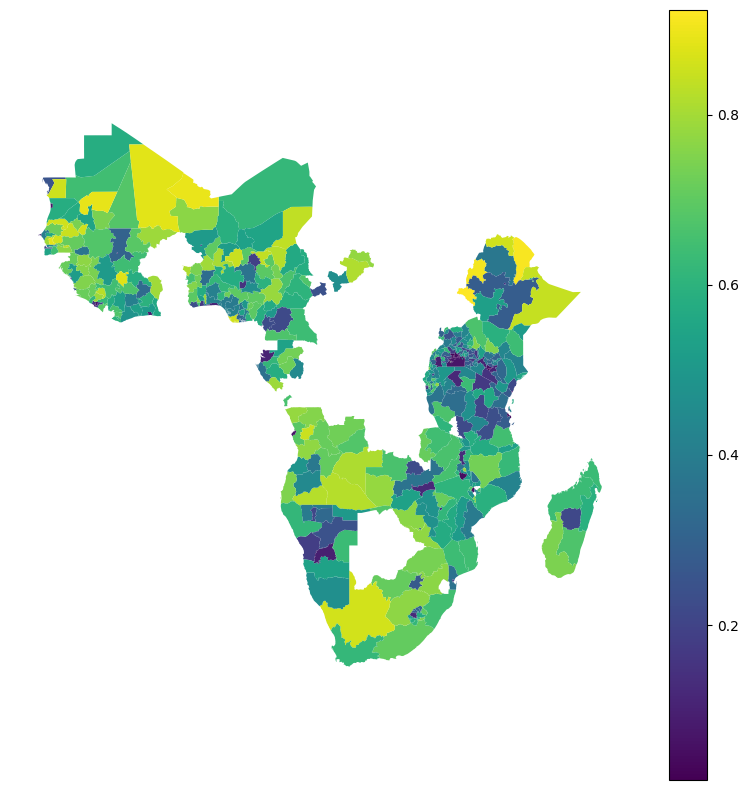

In [10]:
gadm_1.plot(figsize=(10,10),column='ratio_selfloop_to_country',legend=True)
plt.axis('off')
plt.show()

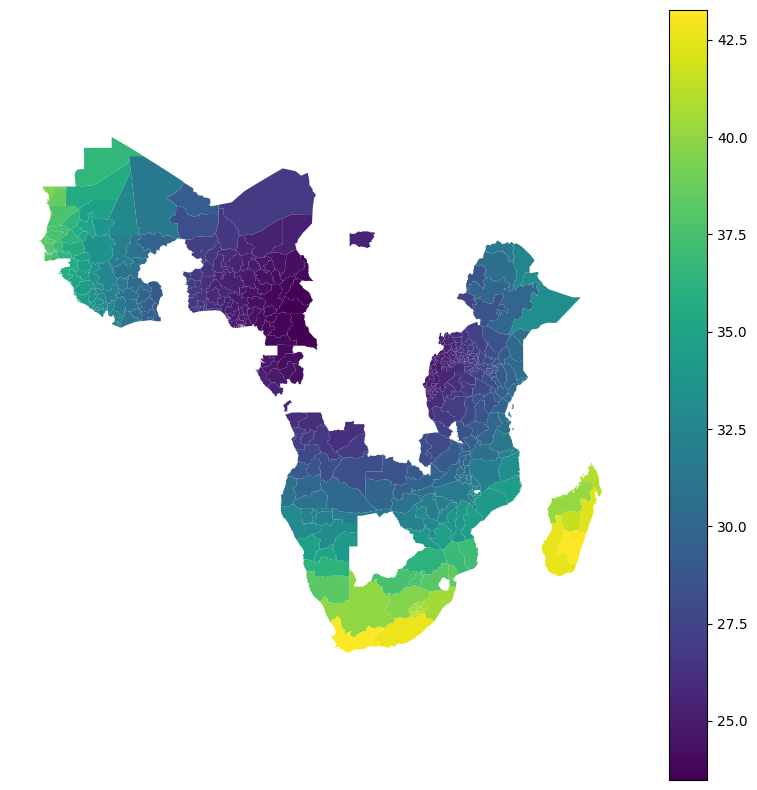

In [12]:
gadm_1.plot(figsize=(10,10),column='Mean_dist_to_SCI',legend=True)
plt.axis('off')
plt.show()

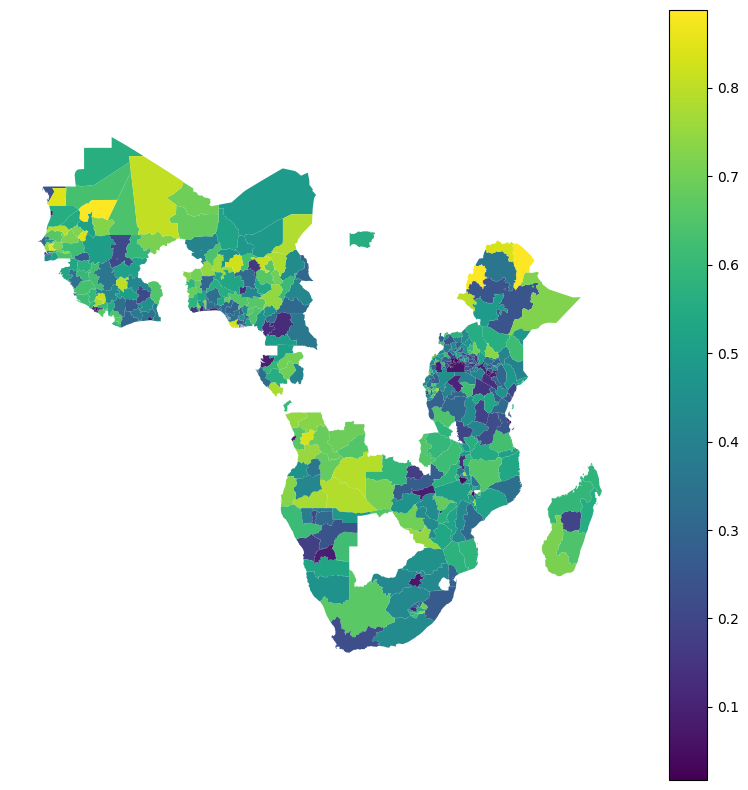

In [13]:
gadm_1.plot(figsize=(10,10),column='ratio_selfloop_to_africa',legend=True)
plt.axis('off')
plt.show()

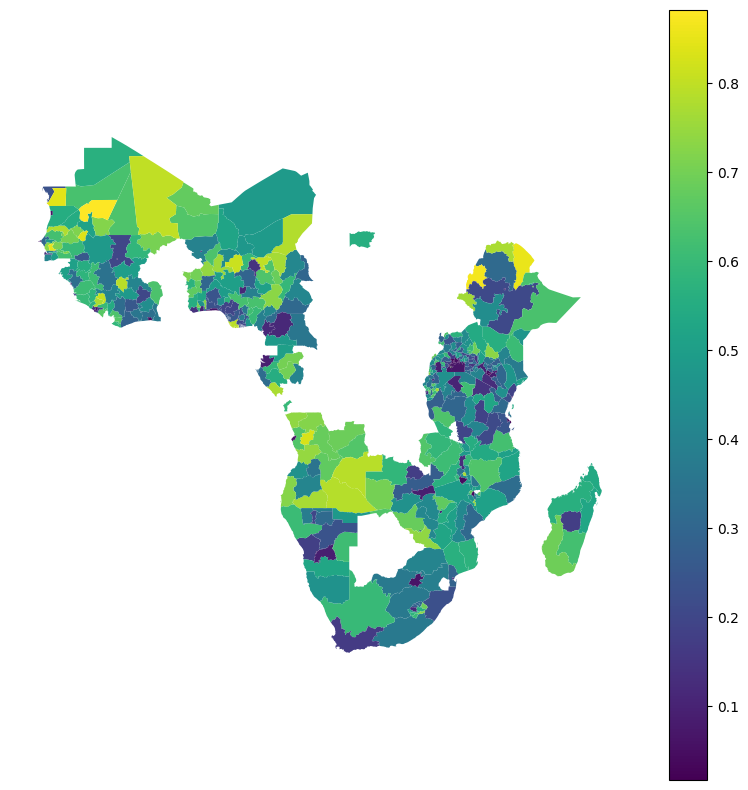

In [14]:
gadm_1.plot(figsize=(10,10),column='ratio_selfloop_to_all_sci',legend=True)
plt.axis('off')
plt.show()

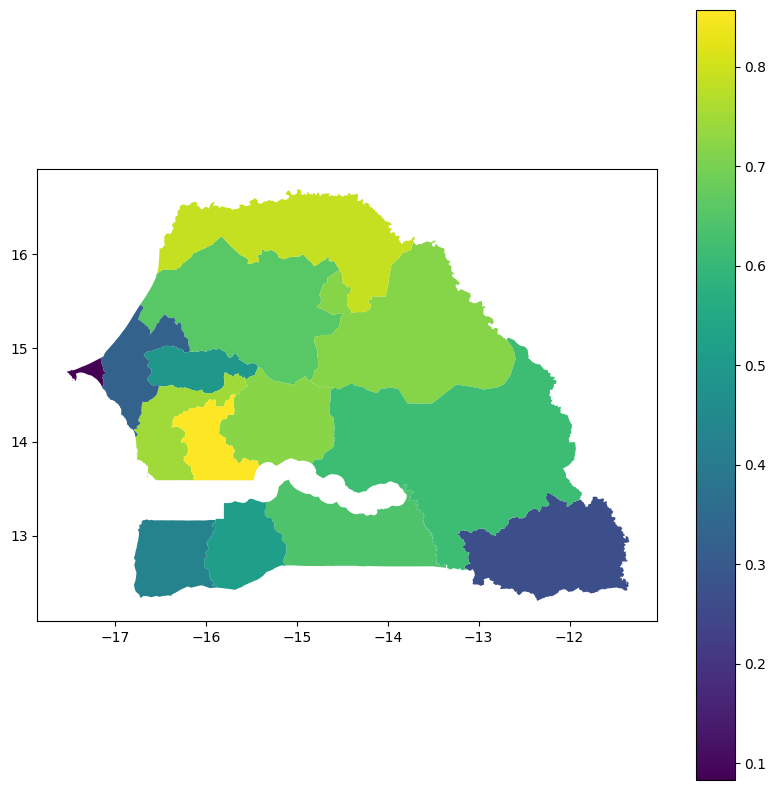

In [16]:
gadm_1[gadm_1['GID_0']=="SEN"][['ratio_selfloop_to_africa','geometry']].plot(figsize=(10,10),column='ratio_selfloop_to_africa',legend=True)
plt.show()

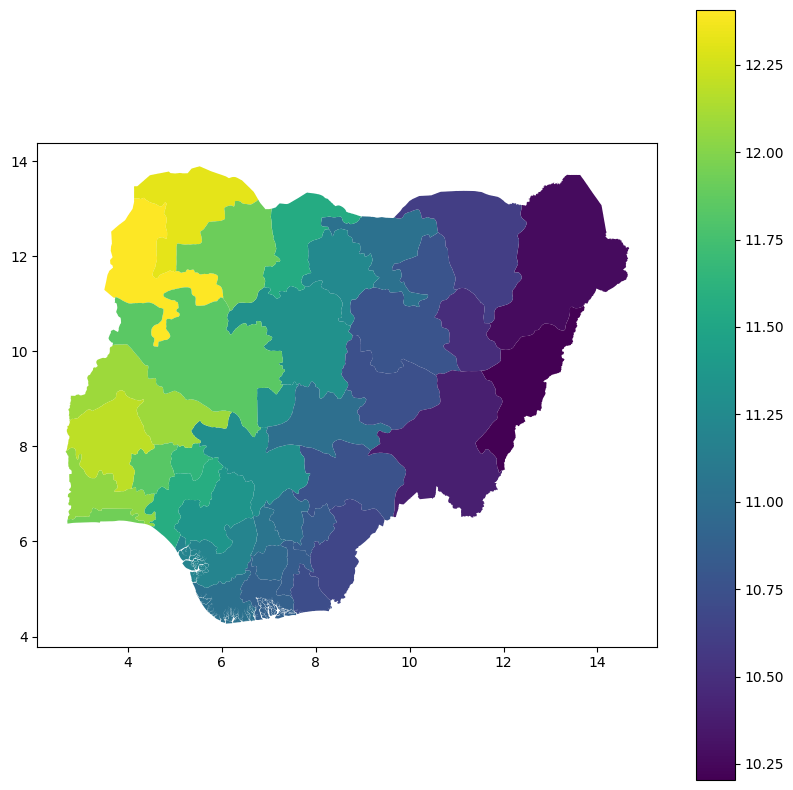

In [17]:
gadm_1[gadm_1['COUNTRY']=="Nigeria"].plot(figsize=(10,10),column='Std_dist_to_SCI',legend=True)
plt.show()

## Afrobarometer data
#### yet to be added

In [19]:
afro_barometer_1 = pd.read_stata("../external_dataset/afro_regional.dta",convert_categoricals=False)
afro_barometer_1.head()

,country,year,region,trpar,trtax,trgov,trlaw,trgen,trrel,trnei,tracq,mp_service
0,1.0,2011.0,100.0,2.133583,1.101359,1.500720,1.685713,0.524865,2.400156,2.119522,1.603183,0.971810
1,1.0,2011.0,101.0,2.546581,1.553177,1.878101,2.164005,0.611403,2.632019,1.969915,1.505002,1.000000
2,1.0,2011.0,102.0,1.543943,1.263010,1.631452,1.728224,0.029859,2.802408,0.929917,0.748173,0.919051
3,1.0,2011.0,103.0,2.012048,1.297439,1.459003,1.977447,0.581889,2.688714,2.124295,1.728058,0.901420
4,1.0,2011.0,104.0,1.763607,1.504161,1.536362,1.756674,0.223407,2.435927,1.507750,1.322588,1.000000


In [96]:
#download data
import wget
import time
#https://data.worldpop.org/GIS/Covariates/Global_2000_2020/DZA/OSM/DST/dza_osm_dst_road_100m_2016.tif
def downloader(source_base_url, destination_path, variables_list, type_data, extended_url=None):
    for country in variables_list:
        print('*'*10, f" downloading {type_data} data for {country}", '*'*10)
        print()
        if extended_url:
            xtd_url = extended_url.replace('#',country)
            xtd_url = xtd_url.replace('$', country.lower())
            url = source_base_url + xtd_url
        else:
            url = source_base_url

        if os.path.isfile(f"{destination_path}{xtd_url.split('/')[-1]}"):
            print(f"{country} file has already been downloaded")
        else:
            wget.download(url,destination_path)
            time.sleep(10)
        
    print("Download completed !!!!!!")

In [97]:
source_base_url = "https://data.worldpop.org/GIS/Covariates/Global_2000_2020/"
destination_path = "../external_dataset/Dist_to_mjr_rd/"
extended_url = "#/OSM/DST/$_osm_dst_road_100m_2016.tif"
variables_list = gadm_1.GID_0.unique().tolist()
type_data = 'Distance to major road'
downloader(source_base_url, destination_path, variables_list, type_data, extended_url)

**********  downloading Distance to major road data for SEN **********

**********  downloading Distance to major road data for AGO **********



KeyboardInterrupt: 

## Night Lights Data

In [28]:
from rasterio.mask import mask

In [29]:
for _,row in gadm_1.iterrows():
    print(row['GID_0'])
    break

SEN


In [30]:
geo1 = gadm_1_geo[gadm_1_geo.GID_1.str.startswith('MUS')].reset_index()
geo1 = geo1.to_crs('4326')

In [31]:
geo1.loc[:3,'geometry']

0    MULTIPOLYGON (((56.65986 -10.44347, 56.66069 -...
1    MULTIPOLYGON (((57.33681 -20.46792, 57.33736 -...
2    MULTIPOLYGON (((57.79625 -20.29014, 57.79653 -...
3    MULTIPOLYGON (((57.71181 -20.44819, 57.71181 -...
Name: geometry, dtype: geometry

In [34]:
with rasterio.open("../external_dataset/Dist_to_mjr_rd_intersections/mus_osm_dst_roadintersec_100m_2016.tif") as src:
    out_image, out_transform = mask(src, [geo1.loc[0,'geometry']], crop=True)
    out_meta = src.meta

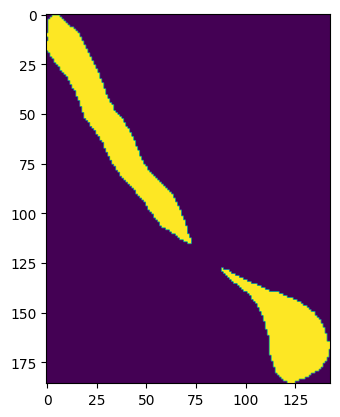

In [35]:
plt.imshow(out_image[0])
plt.show()

In [36]:
out_image.max()

648.529

In [37]:
out_image.min()

-99999.0

In [38]:
data_image = np.where(out_image > 0,out_image, 0)

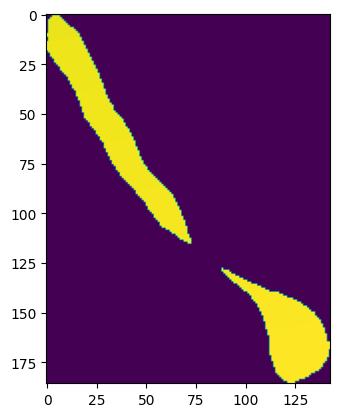

In [39]:
plt.imshow(data_image[0])
plt.show()

In [40]:
data_image.max()

648.529

In [41]:
data_image.min()

0.0

In [89]:
np.count_nonzero(data_image)

189644

In [90]:
data_image.size

189644

In [92]:
np.std(data_image,  dtype=np.float64)

1.6338523097472825e+38

In [93]:
np.median(data_image)

inf